<h1>COVID 19 ANALYSIS</h1>

<img src="https://images.newscientist.com/wp-content/uploads/2020/02/11165812/c0481846-wuhan_novel_coronavirus_illustration-spl.jpg" width="300" height="240" align="center"/>

In [1]:
import pandas as pd 
import os
import datetime
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import folium
import plotly.express as px
from plotly.subplots import make_subplots
import json, requests
from datetime import datetime
import geojson
import urllib
%matplotlib inline

In [2]:
#retriving datasets
df_conf = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_corona = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

In [3]:
df_conf.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,852,852,852,853,853,853,853,854,854,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,96,113,118,130,138,140,142,148,155,166


In [4]:
df_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,384,405,426,446,451,471,478,491,504,546
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,34,34,35,36,36,36,36,37,38,39
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,724,732,741,751,760,767,777,788,799,811
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,52,52,52
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,4,5,5,6,6,6,6,7,8


In [5]:
df_corona.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Australia,2020-06-19 12:33:23,-25.0000,133.0000,7409.0,102.0,6880.0,427.0,29.100893,NaN,NaN,1.376704,36,AUS
1,Austria,2020-06-19 12:33:23,47.5162,14.5501,17271.0,688.0,16141.0,442.0,191.763635,NaN,NaN,3.983556,40,AUT
2,Canada,2020-06-19 12:33:23,60.0010,-95.0010,101879.0,8361.0,63782.0,29737.0,269.124583,NaN,NaN,8.206794,124,CAN
3,China,2020-06-19 12:33:23,30.5928,114.3055,84494.0,4638.0,79515.0,341.0,6.015194,NaN,NaN,5.489147,156,CHN
4,Denmark,2020-06-19 12:33:23,56.2639,9.5018,12591.0,600.0,11482.0,509.0,217.378431,NaN,NaN,4.765309,208,DNK


In [6]:
df_conf = df_conf.rename(columns={"Province/State":"State","Country/Region":"Country"})
df_deaths = df_deaths.rename(columns={"Province/State":"State","Country/Region":"Country"})
df_corona = df_corona.rename(columns={"Country_Region":"Country"})

In [7]:
df_conf.head(2)

,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788


In [8]:
df_deaths.head(2)

,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,384,405,426,446,451,471,478,491,504,546
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,34,34,35,36,36,36,36,37,38,39


In [9]:
df_corona.head(2)

,Country,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Australia,2020-06-19 12:33:23,-25.0000,133.0000,7409.0,102.0,6880.0,427.0,29.100893,NaN,NaN,1.376704,36,AUS
1,Austria,2020-06-19 12:33:23,47.5162,14.5501,17271.0,688.0,16141.0,442.0,191.763635,NaN,NaN,3.983556,40,AUT


In [10]:
dates = df_conf.columns[4:]
df_confcleaned = df_conf.melt(id_vars=['State', 'Country','Lat','Long'], value_vars= dates, var_name='Date',value_name='Confirmed cases')
df_deathscleaned = df_deaths.melt(id_vars=['State', 'Country','Lat','Long'], value_vars= dates, var_name='Date',value_name='Deaths')
datamerged = pd.concat([df_confcleaned,df_deathscleaned['Deaths']], axis= 1, sort= False)
datamerged.head()

,State,Country,Lat,Long,Date,Confirmed cases,Deaths
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0


In [11]:
datamerged[datamerged['Country'] == "Canada"]

,State,Country,Lat,Long,Date,Confirmed cases,Deaths
35,Alberta,Canada,53.9333,-116.5765,1/22/20,0,0
36,British Columbia,Canada,49.2827,-123.1207,1/22/20,0,0
37,Grand Princess,Canada,37.6489,-122.6655,1/22/20,0,0
38,Manitoba,Canada,53.7609,-98.8139,1/22/20,0,0
39,New Brunswick,Canada,46.5653,-66.4619,1/22/20,0,0
40,Newfoundland and Labrador,Canada,53.1355,-57.6604,1/22/20,0,0
41,Nova Scotia,Canada,44.6820,-63.7443,1/22/20,0,0
42,Ontario,Canada,51.2538,-85.3232,1/22/20,0,0
43,Prince Edward Island,Canada,46.5107,-63.4168,1/22/20,0,0
44,Quebec,Canada,52.9399,-73.5491,1/22/20,0,0


In [12]:
datamerged = datamerged[datamerged.Date != 'country']

In [13]:
df_corona["Active"] = df_corona["Confirmed"]-df_corona["Recovered"]-df_corona["Deaths"]

<b>Country wise cases</b>

In [14]:
df_countrywisecases = df_corona.copy().drop(['Lat', 'Long_', 'Incident_Rate', 'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3', 'Last_Update'], axis = 1)
df_countrywisecases[['Confirmed', 'Deaths', 'Recovered', 'Active']] = df_countrywisecases[['Confirmed', 'Deaths', 'Recovered', 'Active']].apply(pd.to_numeric)
df_countrywisecases

,Country,Confirmed,Deaths,Recovered,Active
0,Australia,7409.0,102.0,6880.0,427.0
1,Austria,17271.0,688.0,16141.0,442.0
2,Canada,101879.0,8361.0,63782.0,29736.0
3,China,84494.0,4638.0,79515.0,341.0
4,Denmark,12591.0,600.0,11482.0,509.0
5,Finland,7133.0,326.0,6200.0,607.0
6,France,195272.0,29606.0,74011.0,91655.0
7,Germany,190203.0,8882.0,173886.0,7435.0
8,Iceland,1816.0,10.0,1801.0,5.0
9,Ireland,25355.0,1714.0,22698.0,943.0


In [15]:
df_conf.loc[df_conf['Country'] == "US", "Country"] = "United States of America"
df_deaths.loc[df_deaths['Country'] == "US", "Country"] = "United States of America"
df_corona.loc[df_corona['Country'] == "US", "Country"] = "United States of America"

df_conf.loc[df_conf['Country'] == 'Korea, South', "Country"] = 'South Korea'
df_deaths.loc[df_deaths['Country'] == 'Korea, South', "Country"] = 'South Korea'
df_corona.loc[df_corona['Country'] == "Korea, South", "Country"] = "South Korea"

df_conf.loc[df_conf['Country'] == 'Taiwan*', "Country"] = 'Taiwan'
df_deaths.loc[df_deaths['Country'] == 'Taiwan*', "Country"] = 'Taiwan'
df_corona.loc[df_corona['Country'] == "Taiwan*", "Country"] = "Taiwan"

df_conf.loc[df_conf['Country'] == 'Congo (Kinshasa)', "Country"] = 'Democratic Republic of the Congo'
df_deaths.loc[df_deaths['Country'] == 'Congo (Kinshasa)', "Country"] = 'Democratic Republic of the Congo'
df_corona.loc[df_corona['Country'] == "Congo (Kinshasa)", "Country"] = "Democratic Republic of the Congo"

df_conf.loc[df_conf['Country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_deaths.loc[df_deaths['Country'] == "Cote d'Ivoire", "Country"] = "Côte d'Ivoire"
df_corona.loc[df_corona['Country'] == "Cote d'Ivoire", "Country"] = "Côte d'Ivoire"

df_conf.loc[df_conf['Country'] == "Reunion", "Country"] = "Réunion"
df_deaths.loc[df_deaths['Country'] == "Reunion", "Country"] = "Réunion"
df_corona.loc[df_corona['Country'] == "Reunion", "Country"] = "Réunion"

df_conf.loc[df_conf['Country'] == 'Congo (Brazzaville)', "Country"] = 'Republic of the Congo'
df_deaths.loc[df_deaths['Country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
df_corona.loc[df_corona['Country'] == "Congo (Brazzaville)", "Country"] = "Republic of the Congo"

df_conf.loc[df_conf['Country'] == 'Bahamas, The', "Country"] = 'Bahamas'
df_deaths.loc[df_deaths['Country'] == 'Bahamas, The', "Country"] = 'Bahamas'
df_corona.loc[df_corona['Country'] == 'Bahamas, The', "Country"] = 'Bahamas'

In [16]:
df_corona

,Country,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Australia,2020-06-19 12:33:23,-25.000000,133.000000,7409.0,102.0,6880.0,427.0,29.100893,NaN,NaN,1.376704,36,AUS
1,Austria,2020-06-19 12:33:23,47.516200,14.550100,17271.0,688.0,16141.0,442.0,191.763635,NaN,NaN,3.983556,40,AUT
2,Canada,2020-06-19 12:33:23,60.001000,-95.001000,101879.0,8361.0,63782.0,29736.0,269.124583,NaN,NaN,8.206794,124,CAN
3,China,2020-06-19 12:33:23,30.592800,114.305500,84494.0,4638.0,79515.0,341.0,6.015194,NaN,NaN,5.489147,156,CHN
4,Denmark,2020-06-19 12:33:23,56.263900,9.501800,12591.0,600.0,11482.0,509.0,217.378431,NaN,NaN,4.765309,208,DNK
5,Finland,2020-06-19 12:33:23,61.924100,25.748200,7133.0,326.0,6200.0,607.0,128.737828,NaN,NaN,4.570307,246,FIN
6,France,2020-06-19 12:33:23,46.227600,2.213700,195272.0,29606.0,74011.0,91655.0,299.159635,NaN,NaN,15.161416,250,FRA
7,Germany,2020-06-19 12:33:23,51.165691,10.451526,190203.0,8882.0,173886.0,7435.0,227.016047,NaN,NaN,4.669748,276,DEU
8,Iceland,2020-06-19 12:33:23,64.963100,-19.020800,1816.0,10.0,1801.0,5.0,532.161172,NaN,NaN,0.550661,352,ISL
9,Ireland,2020-06-19 12:33:23,53.142400,-7.692100,25355.0,1714.0,22698.0,943.0,513.488204,NaN,NaN,6.760008,372,IRL


<b>Global cases reported till date</b>

In [17]:
globalcases = pd.DataFrame(df_countrywisecases.sum()).transpose()
globalcases

,Country,Confirmed,Deaths,Recovered,Active
0,AustraliaAustriaCanadaChinaDenmarkFinlandFranc...,8.51452e+06,454522,4.18217e+06,3.82683e+06


<b>Top 10 countries with confirmed, active and death cases</b> 

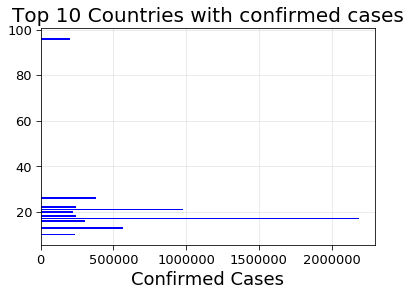

In [18]:
plt.axes(axisbelow=True)
plt.barh(df_countrywisecases.sort_values('Confirmed')["Confirmed"].index[-10:],df_countrywisecases.sort_values('Confirmed')["Confirmed"].values[-10:],color="blue")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 Countries with confirmed cases",fontsize=20)
plt.grid(alpha=0.3)

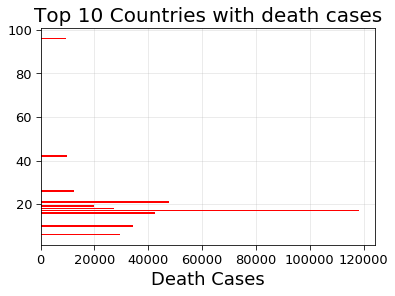

In [19]:
plt.axes(axisbelow=True)
plt.barh(df_countrywisecases.sort_values('Deaths')["Deaths"].index[-10:],df_countrywisecases.sort_values('Deaths')["Deaths"].values[-10:],color="red")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Death Cases",fontsize=18)
plt.title("Top 10 Countries with death cases",fontsize=20)
plt.grid(alpha=0.3)

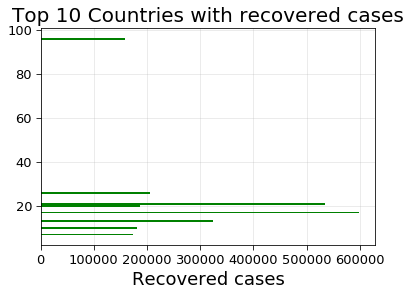

In [20]:
plt.axes(axisbelow=True)
plt.barh(df_countrywisecases.sort_values('Recovered')["Recovered"].index[-10:],df_countrywisecases.sort_values('Recovered')["Recovered"].values[-10:],color="green")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Recovered cases",fontsize=18)
plt.title("Top 10 Countries with recovered cases",fontsize=20)
plt.grid(alpha=0.3)

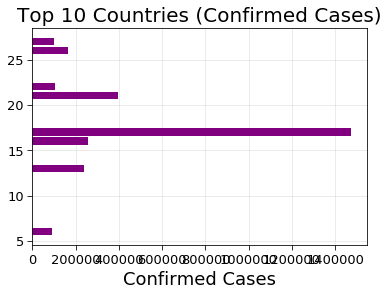

In [31]:
plt.axes(axisbelow=True)
plt.barh(df_countrywisecases.sort_values('Active')["Active"].index[-10:],df_countrywisecases.sort_values('Active')["Active"].values[-10:],color="purple")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 Countries (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)

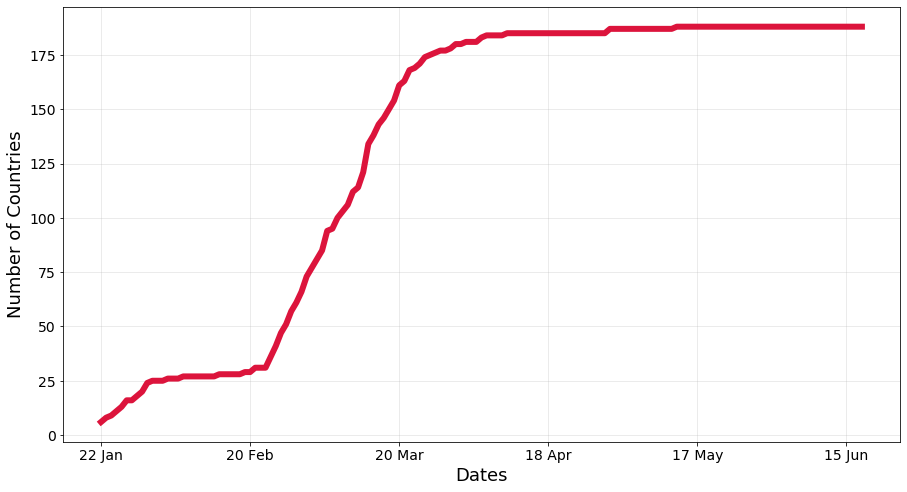

In [22]:
case_nums_country = df_conf.groupby("Country").sum().drop(['Lat','Long'],axis =1).apply(lambda x: x[x > 0].count(), axis =0)
d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in case_nums_country.index]
f = plt.figure(figsize=(15,8))
f.add_subplot(111)
marker_style = dict(c="crimson",linewidth=6, linestyle='-')
plt.plot(d, case_nums_country,**marker_style)
plt.tick_params(labelsize = 14)
plt.xticks(list(np.arange(0,len(d),int(len(d)/5))),d[:-1:int(len(d)/5)]+[d[-1]])
plt.xlabel("Dates",fontsize=18)
plt.ylabel("Number of Countries",fontsize=18)
plt.grid(alpha = 0.3)
plt.show()

In [23]:
world_geo = 'world_countries.json'
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

In [24]:
world_map.choropleth(
    geo_data=world_geo,
    data=df_corona,
    columns=['Country', 'Active'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
)

# display map
world_map

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [25]:
fig = px.pie(df_corona, values= 'Confirmed', names= 'Country', title= 'Distribution of confirmed cases around the world')
fig.update_traces(textposition = 'inside')
fig.show()

In [26]:
fig = px.pie(df_corona, values= 'Deaths', names= 'Country', title= 'Distribution of death cases around the world')
fig.update_traces(textposition = 'inside')
fig.show()

In [29]:
worldcases = datamerged.groupby('Date')['Confirmed cases', 'Deaths'].sum().reset_index()
worldcases['Date'] = pd.to_datetime(worldcases.Date)
worldcases = worldcases.sort_values(by = 'Date')
worldcases

,Date,Confirmed cases,Deaths
0,2020-01-22,555,17
1,2020-01-23,654,18
2,2020-01-24,941,26
3,2020-01-25,1434,42
4,2020-01-26,2118,56
5,2020-01-27,2927,82
6,2020-01-28,5578,131
7,2020-01-29,6166,133
8,2020-01-30,8234,171
9,2020-01-31,9927,213


In [30]:
worldcasesmelt = worldcases.melt(id_vars= ['Date'], value_vars= ['Confirmed cases', 'Deaths'])
fig = px.line(worldcasesmelt, x = "Date", y = "value", color= 'variable')
fig.update_layout(title = "Worldwide confirmed/Death cases over time", xaxis_title = 'Dates', yaxis_title = 'Number of cases')
fig.show()